
## **Network Analysis with pandas and NetworkX: From Tabular Data to Graph Insights**

### **Core Concept Integration**
Network analysis bridges relational data (stored in tables) with graph theory. This synergy enables:
- **Structural Analysis**: Identify hubs, bottlenecks, and connectivity patterns
- **Dynamic Modeling**: Simulate information flow or cascade effects
- **Metric Computation**: Quantify influence through centrality measures

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create meaningful transactional data
relationships = pd.DataFrame({
    'source': ['A', 'B', 'C', 'D', 'A', 'E', 'B', 'F'],
    'target': ['B', 'C', 'D', 'A', 'E', 'F', 'F', 'D'],
    'weight': [3, 2, 5, 1, 4, 3, 2, 4]  # Transaction frequency/strength
})

# Construct directed graph with attributes
G = nx.from_pandas_edgelist(
    relationships, 
    source='source', 
    target='target',
    edge_attr='weight',
    create_using=nx.DiGraph()
)

# Add isolated nodes not in edge list
G.add_nodes_from(['G', 'H'])  # Unconnected entities


### **Key Analysis Techniques**
**1. Centrality Metrics (Directed Graph Version):**

In [2]:
# Degree Centrality (Normalized)
in_degree = nx.in_degree_centrality(G)  # Popularity reception
out_degree = nx.out_degree_centrality(G)  # Influence dispersion

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G, weight='weight')

print(f"In-Degree Centrality: {in_degree}\nBetweenness: {betweenness}")



In-Degree Centrality: {'A': 0.14285714285714285, 'B': 0.14285714285714285, 'C': 0.14285714285714285, 'D': 0.2857142857142857, 'E': 0.14285714285714285, 'F': 0.2857142857142857, 'G': 0.0, 'H': 0.0}
Betweenness: {'A': 0.30952380952380953, 'B': 0.19047619047619047, 'C': 0.0, 'D': 0.30952380952380953, 'E': 0.0, 'F': 0.19047619047619047, 'G': 0.0, 'H': 0.0}



**2. Adjacency Matrix Representation:**


In [3]:
adj_matrix = nx.to_pandas_adjacency(G, weight='weight')
print("\nWeighted Adjacency Matrix:\n", adj_matrix)



Weighted Adjacency Matrix:
      A    B    C    D    E    F    G    H
A  0.0  3.0  0.0  0.0  4.0  0.0  0.0  0.0
B  0.0  0.0  2.0  0.0  0.0  2.0  0.0  0.0
C  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0
D  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
E  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0
F  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0
G  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


**3. Advanced Visualization:**


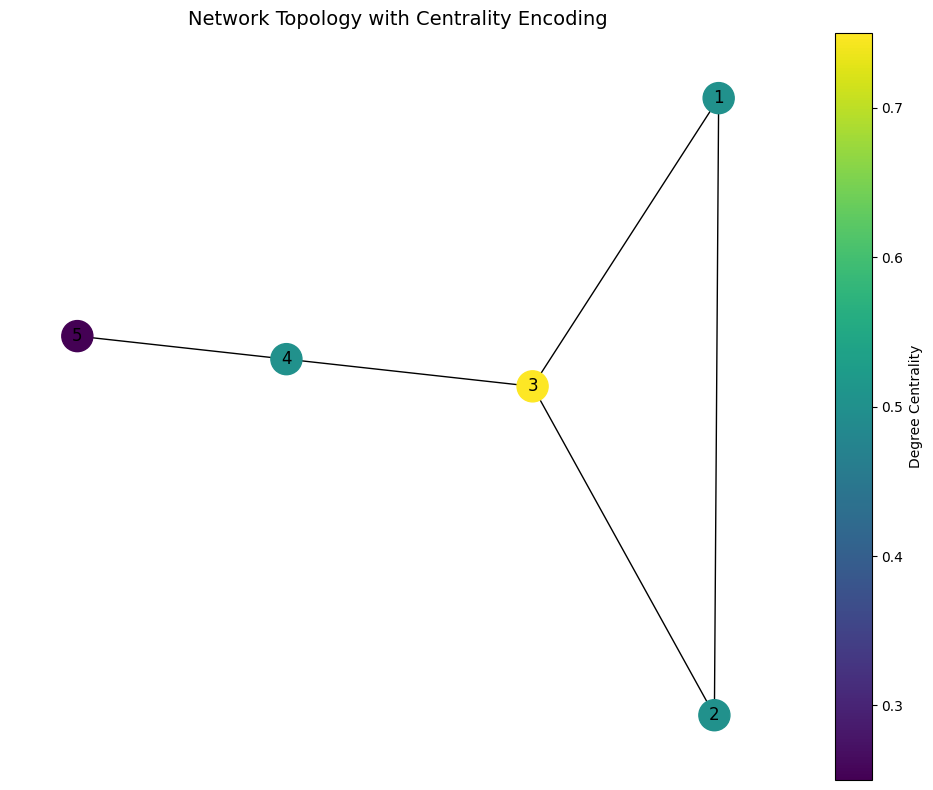

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create and populate the graph
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5)])

# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Create visualization
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, 
                             node_color=list(centrality.values()),
                             node_size=500,
                             cmap=plt.cm.viridis,
                             ax=ax)

nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.colorbar(nodes, label='Degree Centrality')
ax.set_title("Network Topology with Centrality Encoding", fontsize=14)
ax.axis('off')

plt.tight_layout()
plt.show()

The color gradient from purple to yellow encodes degree centrality, indicating each node's relative importance based on its number of connections.


### **Interpretation Framework**
- **Node Size**: Proportional to betweenness centrality (bridge nodes)
- **Node Color**: Indicates in-degree centrality (popularity)
- **Edge Width**: Reflects relationship strength/weight

### **Performance Considerations**
| Operation          | Time Complexity | Space Complexity | pandas Integration |
|---------------------|-----------------|------------------|---------------------|
| Graph Construction | O(E)            | O(N + E)         | Direct edge list conversion |
| Centrality Calc     | O(N^3)*         | O(N)             | Series ↔ Graph metrics |
| Matrix Conversion   | O(N^2)          | O(N^2)           | Native adjacency support |

Betweenness centrality using Brandes' algorithm: O(NE) for unweighted, O(NE + N²logN) for weighted

### **Real-World Applications**
1. **Financial Networks**: Transaction flow analysis
2. **Supply Chains**: Bottleneck identification
3. **Social Networks**: Influence maximization

### **Temporal Networks**

C:\Users\Dilet\AppData\Local\Temp\ipykernel_8888\1415323432.py:35: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, ax=axes[idx], width=2)


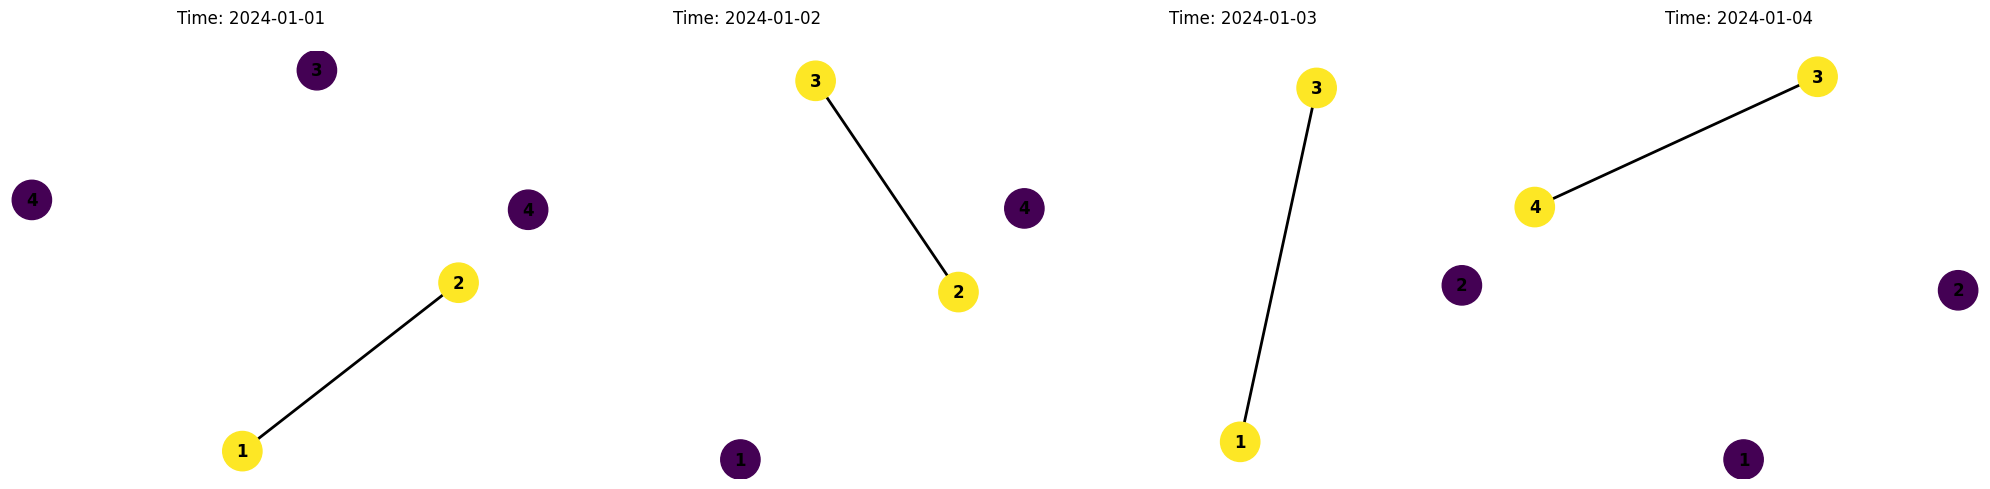

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create sample data
time_edges = pd.DataFrame({
    'source': [1, 2, 1, 3],
    'target': [2, 3, 3, 4],
    'timestamp': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04']
})

# Create base graph for consistent layout
all_nodes = set(time_edges['source'].unique()) | set(time_edges['target'].unique())
base_graph = nx.Graph()
base_graph.add_nodes_from(all_nodes)
pos = nx.spring_layout(base_graph, k=2, iterations=50)

# Plot snapshots
timestamps = time_edges['timestamp'].unique()
fig, axes = plt.subplots(1, len(timestamps), figsize=(20, 5))

for idx, time in enumerate(timestamps):
    current_edges = time_edges[time_edges['timestamp'] == time]
    G = nx.from_pandas_edgelist(current_edges, 'source', 'target')
    
    # Add missing nodes to maintain consistency
    G.add_nodes_from(all_nodes)
    
    centrality = nx.degree_centrality(G)
    nodes = nx.draw_networkx_nodes(G, pos, 
                                 node_color=[centrality.get(n, 0) for n in G.nodes()],
                                 node_size=800,
                                 cmap=plt.cm.viridis,
                                 ax=axes[idx])
    nx.draw_networkx_edges(G, pos, ax=axes[idx], width=2)
    nx.draw_networkx_labels(G, pos, ax=axes[idx], font_size=12, font_weight='bold')
    
    axes[idx].set_title(f'Time: {time}', pad=20, fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

The temporal network visualization shows relationship evolution over 4 days:

1. Day 1: Single edge between nodes 1 and 2
2. Day 2: New connection forms between nodes 2 and 3
3. Day 3: Edge between nodes 1 and 3 appears
4. Day 4: Final connection forms between nodes 3 and 4

Node 3 emerges as a central hub (yellow color) by gaining multiple connections over time, while other nodes maintain fewer connections (purple). This suggests increasing network centralization around node 3.